In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [74]:
df.shape

(18249, 15)

In [35]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [97]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

Droppping unrelevant column

In [98]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [99]:
len(df.columns)

13

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [101]:
df.drop('year', axis = 1, inplace = True)

Dropping year column, as will split date into Year, month & day columns in next step

In [102]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str

Splitting the date into Year, Date & Day to analyse the data better

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  region        18249 non-null  object 
 12  Year          18249 non-null  object 
 13  Month         18249 non-null  object 
 14  Day           18249 non-null  object 
dtypes: float64(9), object(6)
memory usage: 2.1+ MB


In [104]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

There are only 2 types of Avacodos

In [105]:
from sklearn.preprocessing import LabelEncoder

df['type'] = LabelEncoder().fit_transform(df['type'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,Albany,2015,12,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,Albany,2015,11,29


Converted the type column into numeric value

In [106]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000


Now, will examine the relationships between features through df.corr() method

# Data Visualizations

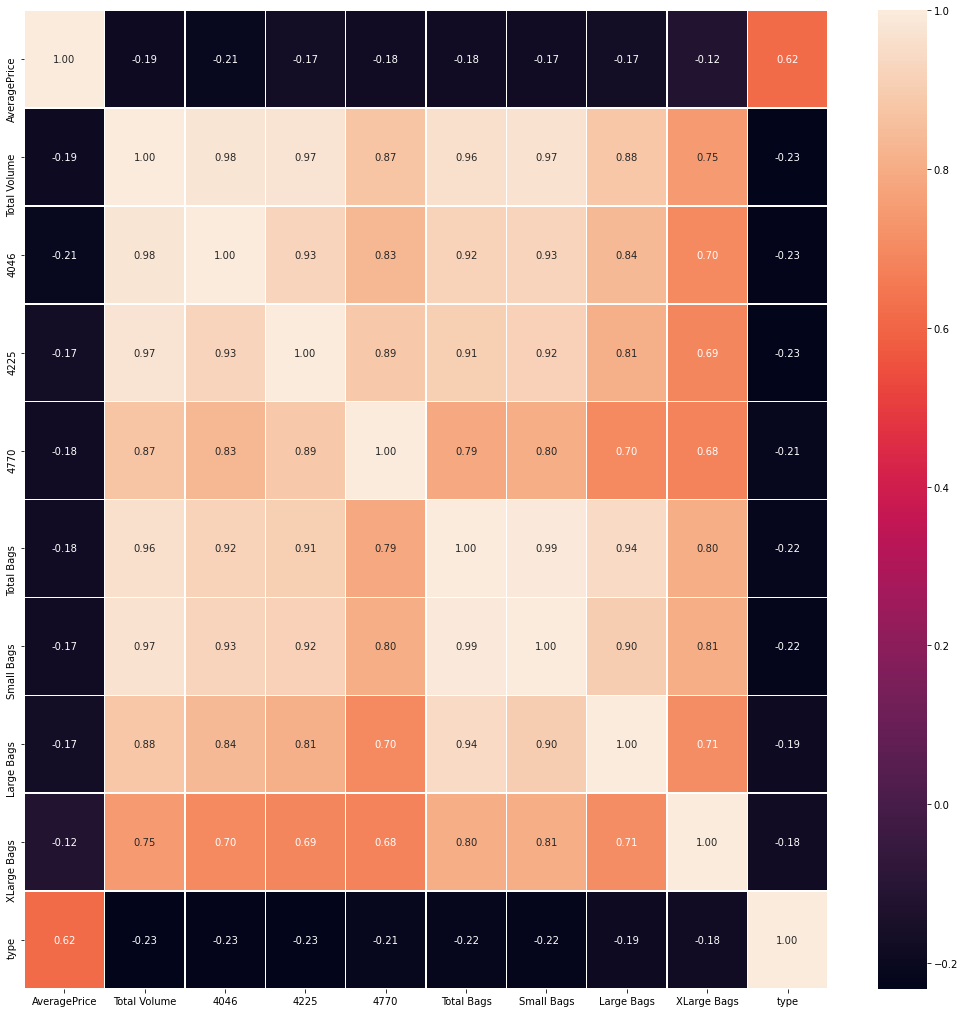

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

f,axis = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.4, fmt= '.2f',ax=axis)
plt.show()


Below are the observations :-
1) We can see that there seems no relation b/w "AveragePrice" with the "type" or the number of bags.

2) It seems as "Total VOlume" increases, the number of small bags increases faster than Large Bags and XLarge Bags.

Now we will do the visual analysis of Tital volume v/s the different bags

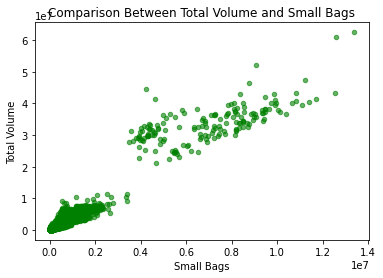

In [64]:
df.plot(kind = 'scatter', x = 'Small Bags', y = 'Total Volume', color = 'green', alpha = 0.6)
plt.xlabel('Small Bags')
plt.ylabel('Total Volume')
plt.title("Comparison Between Total Volume and Small Bags")
plt.show()

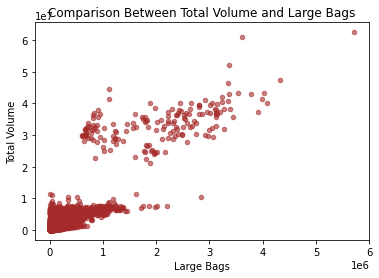

In [65]:
df.plot(kind = 'scatter', x = 'Large Bags', y = 'Total Volume', color = 'brown', alpha = 0.6)
plt.xlabel('Large Bags')
plt.ylabel('Total Volume')
plt.title("Comparison Between Total Volume and Large Bags")
plt.show()

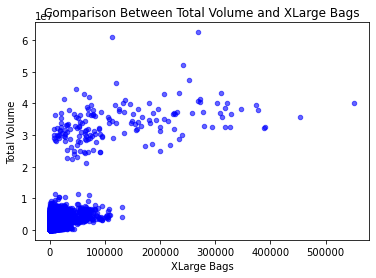

In [66]:
df.plot(kind = 'scatter', x = 'XLarge Bags', y = 'Total Volume', color = 'blue', alpha = 0.6)
plt.xlabel('XLarge Bags')
plt.ylabel('Total Volume')
plt.title("Comparison Between Total Volume and XLarge Bags")
plt.show()

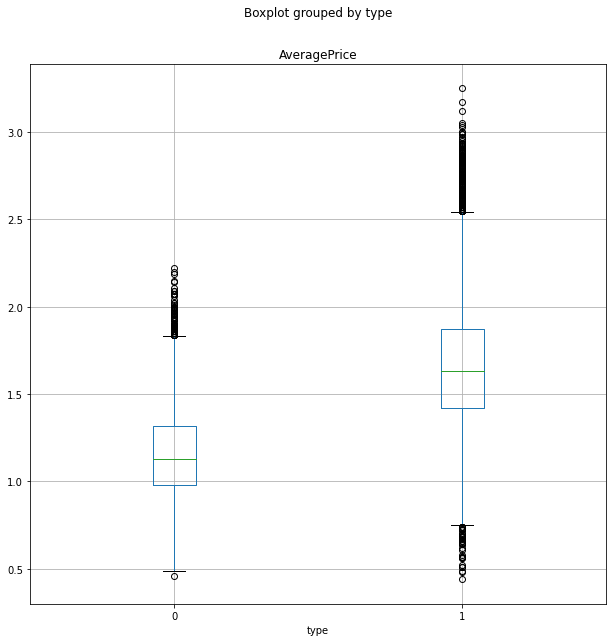

In [67]:
df.boxplot(column = 'AveragePrice', by = 'type', figsize = (10,10))
plt.show()

There seems to be outliners for type 1 avocados, now we will calculate the thresholds of Avg price.

In [69]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000


IQR = Q3 - Q1 = 1.66 - 1.10 = 0.56

Q3 + (1.5).(IQR) = 1.66 + (1.5).(0.56) = 2.5 (upper threshold)

Q1 - (1.5).(IQR) = 1.10 - (1.5).(0.56) = 0.26 (lower threshold)

Avocados that have average price higher than 2.5 or lower than 0.26 are outliers. Let's check how many outliers do we have.

In [107]:
outliers = (df['AveragePrice'] > 2.5) | (df['AveragePrice'] < 0.26)
df[outliers].count()

Date            203
AveragePrice    203
Total Volume    203
4046            203
4225            203
4770            203
Total Bags      203
Small Bags      203
Large Bags      203
XLarge Bags     203
type            203
region          203
Year            203
Month           203
Day             203
dtype: int64

So seems like only 203 out of 18249, which is very less

In [108]:
df.groupby('region').size()


region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

Approximately, there are 338 observations from each region, sample seems balanced.

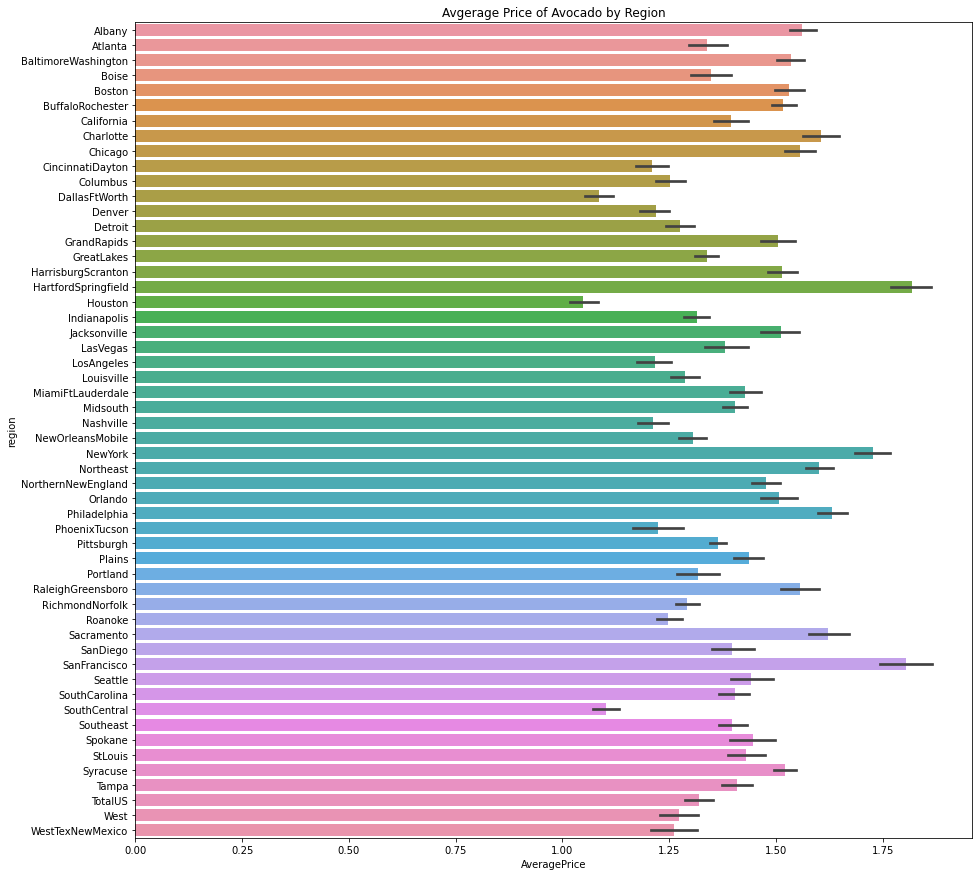

In [109]:
plt.figure(figsize=(15,15))

plt.title("Avgerage Price of Avocado by Region")

sns.barplot(x="AveragePrice",y="region",data=df)

plt.show()

In [111]:
df1 = pd.get_dummies(df['region'],drop_first=True)
df = pd.concat([df,df1],axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,0,0,0,0,0,0,0,0,0,1
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0,0,0,0,0,0,0,0,0,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,0,0,0,0,0,0,0,0,0,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       ...
       'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane', 'StLouis',
       'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'],
      dtype='object', length=121)

# Model Selection for Avg Price Prediction

In [115]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg

LinearRegression()

Will use Liner Regression model only as the Label value is continous in nature

In [166]:
x = df.drop(['AveragePrice','Date','region'], axis = 1)
y = df['AveragePrice']

In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=25)

linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)

In [168]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [169]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.1940031741952234

In [170]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.2580841245446614

In [171]:
print('Score with Linear Regression is', r2_score( y_test, y_pred ))

Score with Linear Regression is 0.5893311092908611


Score is very very less when using Linear Regression, now will try with RandomForestRegressor

In [172]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor( random_state=1 )
rfr.fit( x_train, y_train )
y_pred = rfr.predict( x_test )

print('Score with RandomForestRegressor is', r2_score( y_test, y_pred ))

Score with RandomForestRegressor is 0.8985138039676479


In [173]:
import pickle
filename = 'avocado_avgprice.pkl'
pickle.dump(rfr, open(filename, 'wb' ))

Saving the model for Avg Price Prediction

In [174]:
filename = 'avocado_avgprice.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8985138039676479


Trying to Load the model just to check if saved model is working or not

# Model Selection for Region Prediction

In [176]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg

LogisticRegression()

In [177]:
x = df.drop(['Date','region'], axis = 1)
y = df['region']

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=25)

logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [179]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm


array([[ 0,  0,  4, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  6,  0],
       [ 0,  0, 43, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 59,  2,  0],
       [ 0,  0,  0, ..., 14, 40,  0],
       [ 0,  0,  3, ...,  2, 12,  0]], dtype=int64)

In [180]:
cr = classification_report(y_test, y_pred)
cr

'                     precision    recall  f1-score   support\n\n             Albany       0.00      0.00      0.00       119\n            Atlanta       0.00      0.00      0.00       120\nBaltimoreWashington       0.42      0.39      0.41       110\n              Boise       0.00      0.00      0.00       111\n             Boston       0.00      0.00      0.00       115\n   BuffaloRochester       0.01      0.02      0.01        96\n         California       0.13      0.41      0.20       124\n          Charlotte       0.00      0.00      0.00       110\n            Chicago       0.74      0.54      0.63       123\n   CincinnatiDayton       0.02      0.03      0.02       102\n           Columbus       0.00      0.00      0.00       112\n      DallasFtWorth       0.00      0.00      0.00        97\n             Denver       0.09      0.50      0.16       105\n            Detroit       0.19      0.19      0.19       121\n        GrandRapids       0.00      0.00      0.00       110\n     

In [187]:
acc_score = accuracy_score(y_test, y_pred)
print('Score with Logisitic Regression is', acc_score)

Score with Logisitic Regression is 0.13498256682716253


Score is very very less when using Logisitic Regression, now will try with RandomForestClassifier

In [188]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [189]:
rfc.fit( x_train, y_train )
y_pred = rfc.predict( x_test )
acc_score = accuracy_score(y_test, y_pred)
print('Score with RandomForestClassifier is', acc_score)

Score with RandomForestClassifier is 1.0


Great! 100 % accuracy with RandomForestClassifier 

In [190]:
import pickle
filename = 'avocado_region.pkl'
pickle.dump(rfc, open(filename, 'wb' ))

saving the model for Region prediction

In [192]:
filename = 'avocado_region.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

1.0


Trying to Load the model just to check if saved model is working or not